In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler

In [2]:
tweet = pd.DataFrame({'day': ['one', 'two', 'three', 'four', 'five', 'six', 'seven'], 'sentiment': [15, 20, 35, 45, -90, -66, -17]})
stock = pd.DataFrame({'day': ['one', 'two', 'three', 'four', 'five', 'six', 'seven'], 'close': [2000, 6500, 5400, 4543, 1000, 6040, 2300]})
df = pd.merge(tweet, stock, how='outer')
df

,day,sentiment,close
0,one,15,2000
1,two,20,6500
2,three,35,5400
3,four,45,4543
4,five,-90,1000
5,six,-66,6040
6,seven,-17,2300


In [3]:
scaler = StandardScaler()
data = df.drop(columns='day')
print(scaler.fit(data))
dataClean = scaler.transform(data)
print(dataClean)
print(type(dataClean))

StandardScaler()
[[ 0.48494726 -0.97497571]
 [ 0.58907704  1.25325724]
 [ 0.90146637  0.70857808]
 [ 1.10972593  0.28422349]
 [-1.7017781  -1.47013858]
 [-1.20195516  1.02548232]
 [-0.18148333 -0.82642684]]
<class 'numpy.ndarray'>


In [5]:
scaled_df = pd.DataFrame(dataClean, index=df.index, columns=['sentiment','close'])
scaled_df['positive'] = scaled_df['sentiment'] > -0
scaled_df['day'] = df.day

columns_reorder = ['day', 'sentiment', 'positive', 'close']
scaled_df = scaled_df.reindex(columns=columns_reorder)
scaled_df

,day,sentiment,positive,close
0,one,0.484947,True,-0.974976
1,two,0.589077,True,1.253257
2,three,0.901466,True,0.708578
3,four,1.109726,True,0.284223
4,five,-1.701778,False,-1.470139
5,six,-1.201955,False,1.025482
6,seven,-0.181483,False,-0.826427


C:\Users\laptop\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


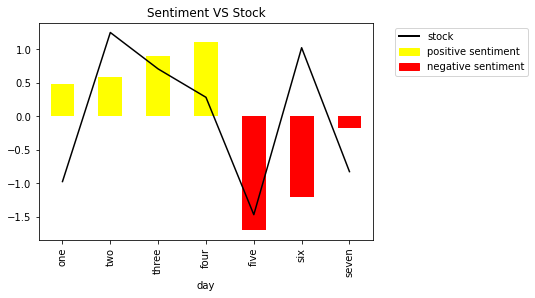

In [6]:
legend_elements = [Line2D([0], [0], color='black', lw=2, label='stock'), 
                   Patch(color='yellow', label='positive sentiment'), 
                   Patch(color='red', label='negative sentiment')]

ax = scaled_df[['day', 'close']].plot(x='day', kind='line', color='black', legend=False)
scaled_df[['day', 'sentiment']].plot(x='day', kind='bar', ax=ax, legend= False, color=[scaled_df.positive.map({True: 'yellow', False: 'red'})])
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1))
plt.title('Sentiment VS Stock')
plt.show()